In [1]:
import os
os.getcwd()

'/Users/yuechenjiang/Desktop/CatMemo/Final_result'

In [2]:
cd character

/Users/yuechenjiang/Desktop/CatMemo/Final_result/character


In [3]:
import pandas as pd
df_TSLA_Bi = pd.read_csv('TSLA_Bi.csv') # 2022-06-16 - 2022-12-28
df_TSLA_seeking = pd.read_csv('TSLA_seeking_V8.csv') # 2022-06-16 - 2022-12-28
df_TSLA_averse = pd.read_csv('TSLA_averse_V6.csv') # 2022-06-16 - 2022-12-28

In [4]:
import yfinance as yf
Start = '2022-06-16'
End = '2022-12-28'
Ticker = 'TSLA'
df = yf.download(Ticker, start=Start, end=End)
price = df['Adj Close'].tolist()

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_TSLA_Bi['date'] = pd.to_datetime(df_TSLA_Bi['date'])
df_TSLA_seeking['date'] = pd.to_datetime(df_TSLA_seeking['date'])
df_TSLA_averse['date'] = pd.to_datetime(df_TSLA_averse['date'])
TSLA_Bi = df_TSLA_Bi[(df_TSLA_Bi['date'] >= Start) & (df_TSLA_Bi['date'] < End)]['direction'].tolist()
TSLA_seeking = df_TSLA_seeking[(df_TSLA_seeking['date'] >= Start) & (df_TSLA_seeking['date'] < End)]['direction'].tolist()
TSLA_averse = df_TSLA_averse[(df_TSLA_averse['date'] >= Start) & (df_TSLA_averse['date'] < End)]['direction'].tolist()

/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_91862/1367013596.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_TSLA_Bi['date'] = pd.to_datetime(df_TSLA_Bi['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_91862/1367013596.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_TSLA_seeking['date'] = pd.to_datetime(df_TSLA_seeking['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_91862/1367013596.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_TSLA_averse['date'] = pd.to_datetime(df_TSLA_averse['date'])


In [6]:
import numpy as np
def reward_list(price, actions):
    # share = 0
    reward = 0
    reward_list = [0]
    for i in range(len(price)-1):
        # share += actions[i]
        reward += actions[i] * np.log(price[i+1]/price[i])
        reward_list.append(reward)
    return reward_list

In [7]:
B_H = [1] * 496
B_H_rw = reward_list(price, B_H)
TSLA_Bi_rw = reward_list(price, TSLA_Bi)
TSLA_seeking_rw = reward_list(price, TSLA_seeking)
TSLA_averse_rw = reward_list(price, TSLA_averse)

In [8]:
Date = df_TSLA_seeking[(df_TSLA_seeking['date'] >= Start) & (df_TSLA_seeking['date'] < End)]['date'].tolist()
len(Date)

134

In [9]:
len(TSLA_seeking_rw)

134

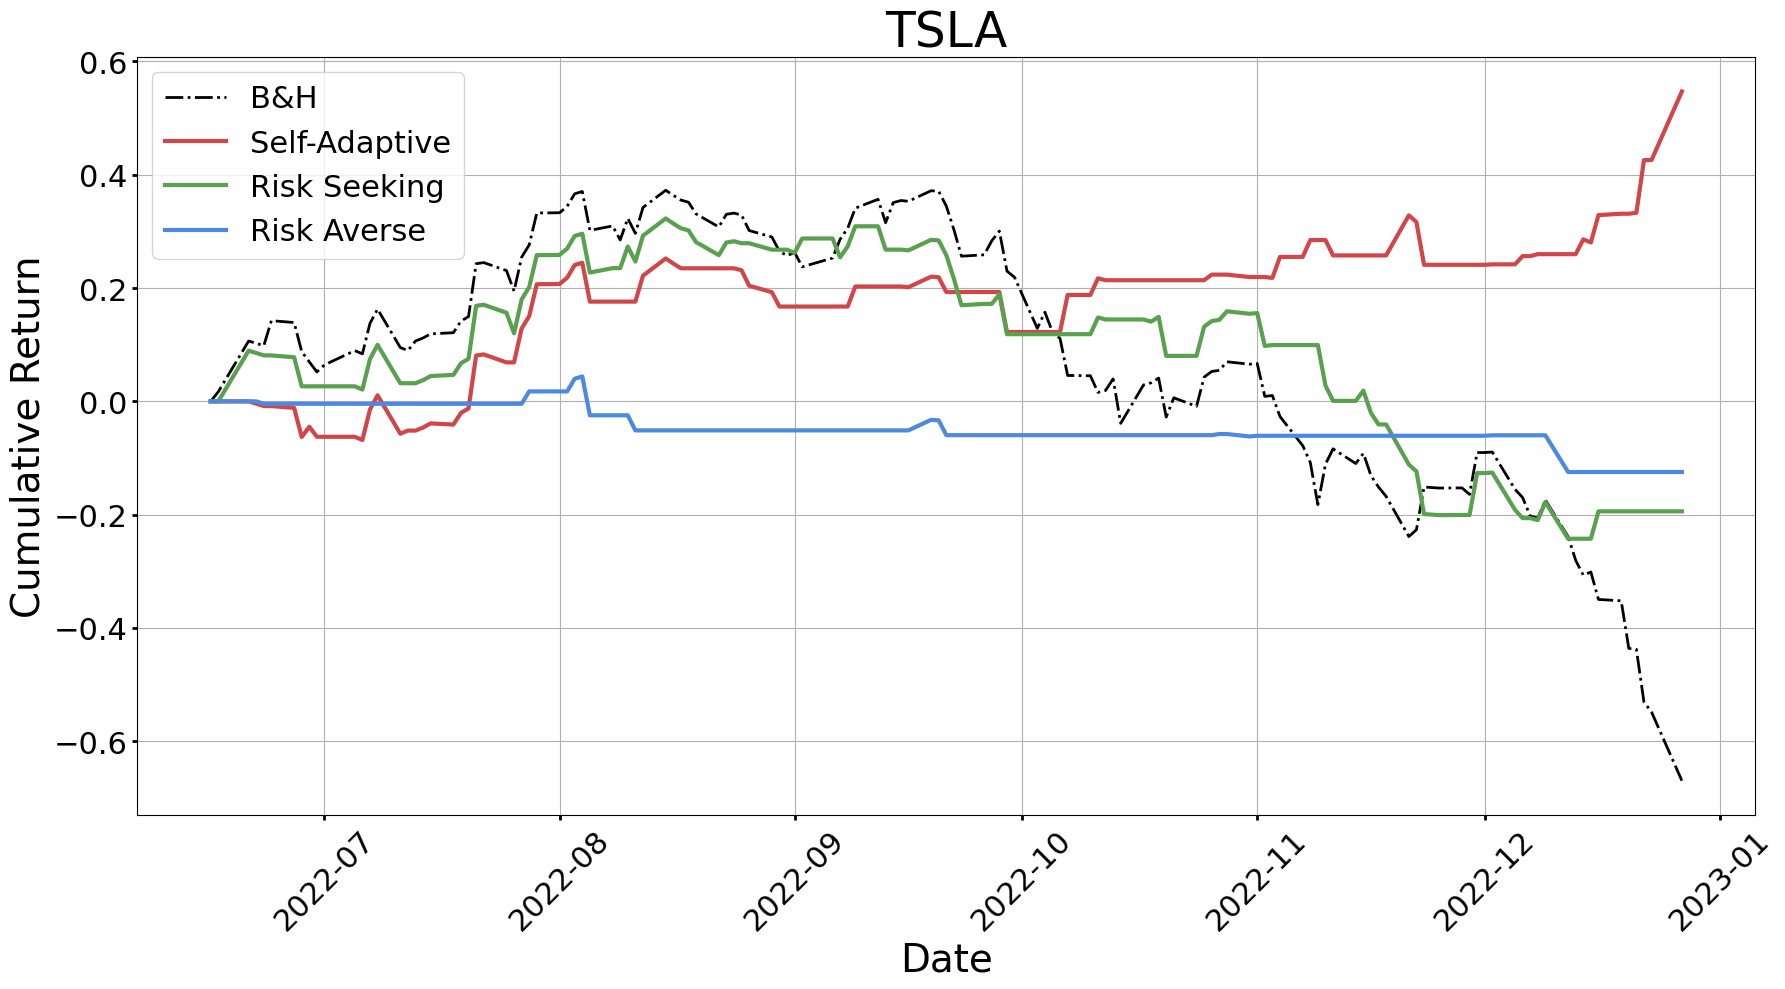

In [10]:
import matplotlib.pyplot as plt
import datetime

dates = pd.to_datetime(Date).tolist()
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting the three lists
plt.plot(dates, B_H_rw, linewidth=2, label='B&H', linestyle='-.', color = '#000')
plt.plot(dates, TSLA_Bi_rw, linewidth=3, label='Self-Adaptive', color = '#d14749')
plt.plot(dates, TSLA_seeking_rw, linewidth=3, label='Risk Seeking', color = '#59a14f')
plt.plot(dates, TSLA_averse_rw, linewidth=3, label='Risk Averse', color = '#4e89e0')

# Set the labels and title
ax.set_xlabel('Date', fontsize=28)
ax.set_ylabel('Cumulative Return', fontsize=28)
plt.title(Ticker, fontsize=35)

# Customize the legend
ax.legend(fontsize=22, frameon=True)

# Customize the grid
ax.grid(True)

# Customize the tick labels on both axes
ax.tick_params(axis='x', labelsize=22, width=2, rotation=45)  # Rotate x-axis labels
ax.tick_params(axis='y', labelsize=22, width=2)  # y-axis labels

# Apply tight layout to ensure everything fits without overlapping
plt.tight_layout()

plt.savefig('TSLA_Character.png')
# Show the plot
plt.show()